# Income Prediction

**Authors:** Daniel Davidík, Michael Slavev

**Data:** https://www.kaggle.com/datasets/lodetomasi1995/income-classification/
       
The goal of this project is to predict whether a person makes over $50K a year.

Basic about data:

- **age**: the age of an individual
- **workclass**: a general term to represent the employment status of an individual
- **fnlwgt**: final weight. In other words, this is the number of people the census believes the entry represents..
- **education**: the highest level of education achieved by an individual.
- **education-­num**: the highest level of education achieved in numerical form.
- **marital­status**: marital status of an individual. Married­civ­spouse corresponds to a civilian spouse while Married­AF­spouse is a spouse in the Armed Forces.
- **occupation**: the general type of occupation of an individual
- **relationship**: represents what this individual is relative to others. For example an
individual could be a Husband. Each entry only has one relationship attribute and is
somewhat redundant with marital status. We might not make use of this attribute at all.
- **race**: Descriptions of an individual’s race
- **sex**: the biological sex of the individual
- **capital-­gain**: capital gains for an individual
- **capital-­loss**: capital loss for an individual
- **hours-­per-­week**: the hours an individual has reported to work per week
- **native-­country**: country of origin for an individual
- **income**: whether or not an individual makes more than $50,000 annually.


Attribute **income** is our target variable and other attributes are utilized for prediction.

In [1]:
#import sys
#!{sys.executable} -m pip install pandas numpy matplotlib scikit-learn seaborn statsmodels

# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, RocCurveDisplay

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Rest
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
# Read data
df = pd.read_csv('income_evaluation.csv')
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## 1. Exploratory Data Analysis
##### The data file consist of 15 columns and 32561 entries

In [3]:
print("Dataset shape: ", df.shape)

Dataset shape:  (32561, 15)


##### Information about the dataset 
Such as the number of non-null values and the data types of each feature.
There you can see that every column following age has whitespace and contains dashes.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### Dataset summary

In [5]:
df.describe().applymap('{:,.2f}'.format)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,"32,561.00","32,561.00","32,561.00","32,561.00","32,561.00","32,561.00"
mean,38.58,"189,778.37",10.08,"1,077.65",87.30,40.44
std,13.64,"105,549.98",2.57,"7,385.29",402.96,12.35
min,17.00,"12,285.00",1.00,0.00,0.00,1.00
25%,28.00,"117,827.00",9.00,0.00,0.00,40.00
50%,37.00,"178,356.00",10.00,0.00,0.00,40.00
75%,48.00,"237,051.00",12.00,0.00,0.00,45.00
max,90.00,"1,484,705.00",16.00,"99,999.00","4,356.00",99.00


##### Check for missing data
The dataset does not contain any missing values.

In [6]:
missingPd = pd.DataFrame()
missingPd["isNull"] = df.isnull().any()
missingPd["isNan"] = df.isna().any()

missingPd

,isNull,isNan
age,False,False
workclass,False,False
fnlwgt,False,False
education,False,False
education-num,False,False
marital-status,False,False
occupation,False,False
relationship,False,False
race,False,False
sex,False,False


##### Check for duplicate data
The dataset does contain duplicates.

In [7]:
print("Number of duplicates: ", df.duplicated().sum())

Number of duplicates:  24


Cleaning up column names

In [8]:
df.columns = df.columns.str.replace(' ', '')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### Some data vizualization

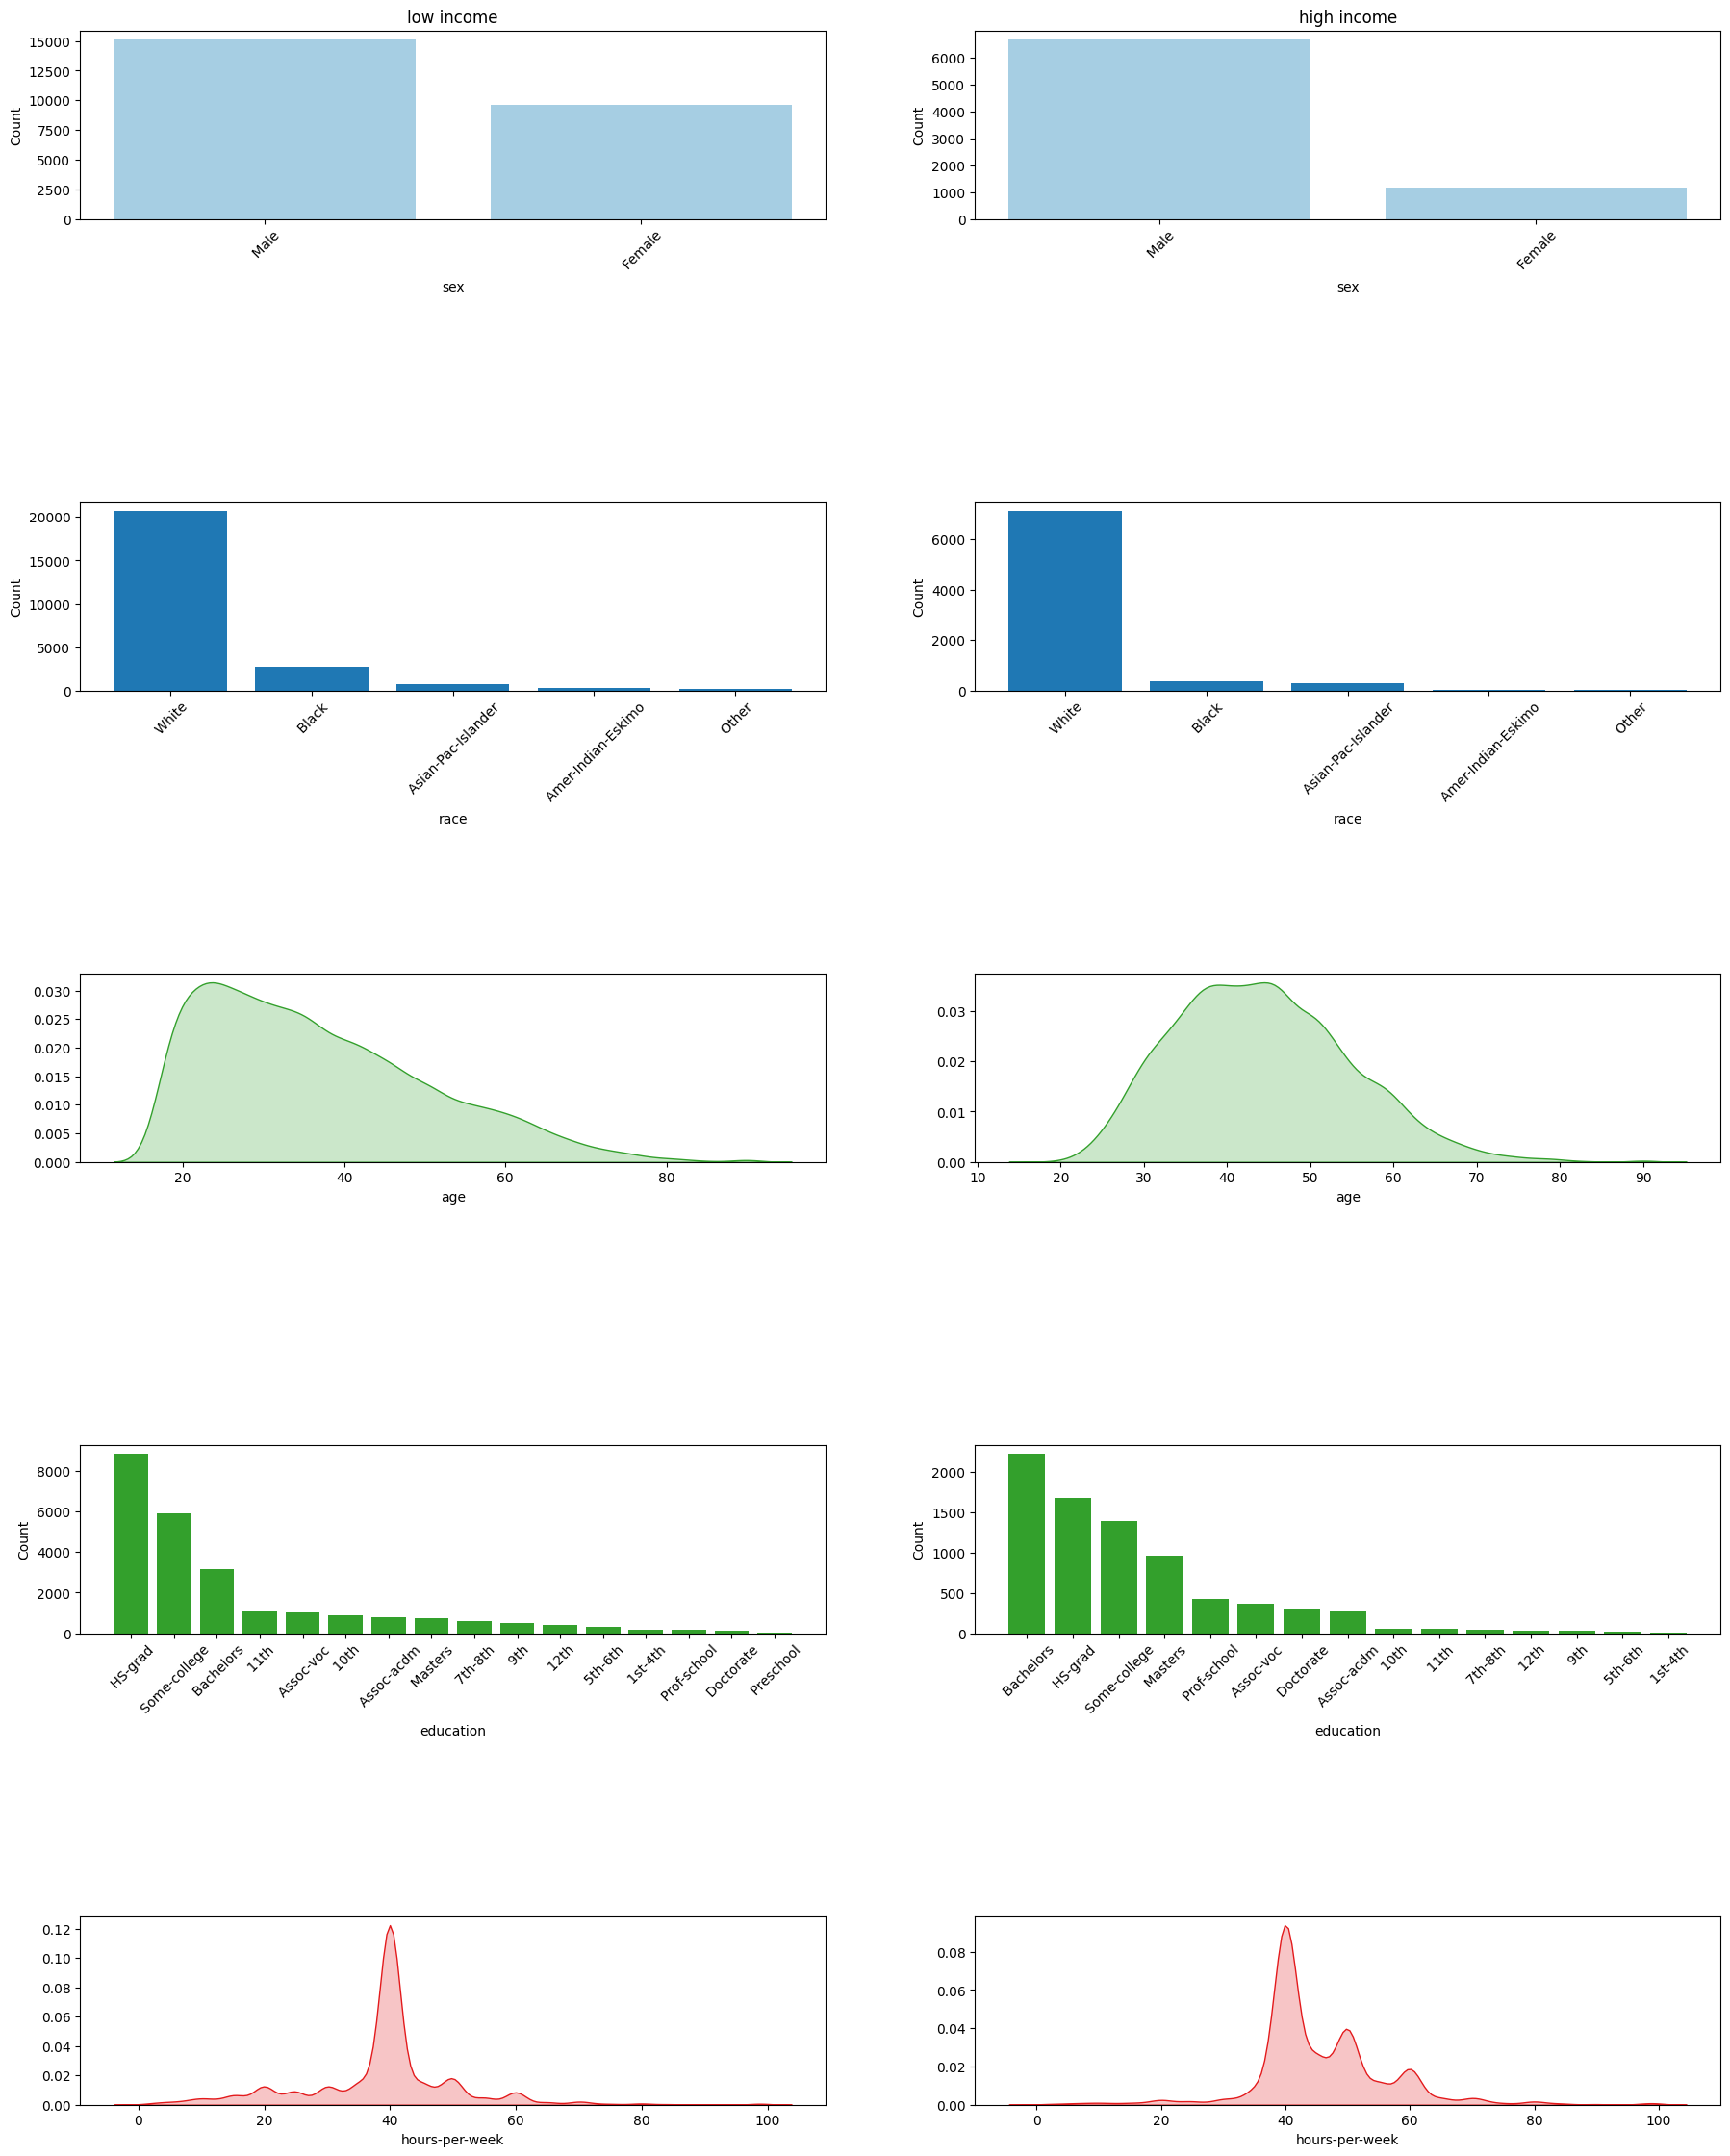

In [9]:
cols = ['low income', 'high income']
interested_vars = ['sex', 'race', 'age', 'education', 'hours-per-week']

colors = list(sns.color_palette("Paired"))
fig, ax = plt.subplots(nrows=len(interested_vars), ncols=2, figsize=(22, 28))
fig.set_facecolor('white')
plt.subplots_adjust(hspace=1.5)


for i, var in enumerate(interested_vars):
    if df[var].dtype == 'O':
        # Count plots for categorical variables
        low_income_counts = df.loc[df['income'] == ' <=50K'][var].value_counts()
        high_income_counts = df.loc[df['income'] == ' >50K'][var].value_counts()

        ax[i, 0].bar(low_income_counts.index, low_income_counts, label='<=50K', color=colors[i])
        ax[i, 1].bar(high_income_counts.index, high_income_counts, label='>50K', color=colors[i])

        ax[i, 0].set_xlabel(var)
        ax[i, 1].set_xlabel(var)
        ax[i, 0].set_ylabel('Count')
        ax[i, 1].set_ylabel('Count')

        ax[i, 0].tick_params(axis='x', rotation=45)
        ax[i, 1].tick_params(axis='x', rotation=45)

    else:  
        # Count plots for numerical variables variables using KDE
        sns.kdeplot(x=df.loc[df['income'] == ' <=50K'][var],
                    shade=True, color=colors[i + 1], ax=ax[i, 0]).set(ylabel='', xlabel=var)

        sns.kdeplot(x=df.loc[df['income'] == ' >50K'][var],
                    shade=True, color=colors[i + 1], ax=ax[i, 1]).set(ylabel='', xlabel=var)

for ax, col in zip(ax[0], cols):
    ax.set_title(col, fontdict={'fontsize': 12})

plt.show()

## 2. Data preprocessing

##### Remove the duplicate tuples

In [10]:
df.drop_duplicates(inplace=True)
print("Dataset shape after removing duplicates: ", df.shape)

Dataset shape after removing duplicates:  (32537, 15)


Removing unnecessary columns.
- fnlwgt
  - number of people the census believes the entry represents - not relevant
- education_num
  - represents education as number - duplicate column

In [11]:
df.drop('fnlwgt', axis=1,inplace=True)
df.drop('education-num', axis=1,inplace=True)

##### Remove whitespaces from string type columns

In [12]:
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

##### Turn target income attribute into numerical data

In [13]:
df['income'].replace(['<=50K','>50K'],[0,1],inplace=True)
a = ['workclass', 'education', 'marital-status', 'occupation','relationship','race','sex','native-country']
for i in a:
    df[i] = df[i].astype('|S')
    df[i] = LabelEncoder().fit_transform(df[i])

##### Checking Variance inflation factor to determine which columns to drop

In [14]:
variables = df[['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

,VIF,Features
0,8.345650,age
1,8.435484,workclass
2,7.648285,education
3,3.908106,marital-status
4,3.637542,occupation
5,2.579027,relationship
6,17.142398,race
7,4.400729,sex
8,1.035453,capital-gain
9,1.056986,capital-loss


We decided to drop columns with VIF factor over 10 which could be potentially problematic.
High VIF values imply that the variance of the estimated regression coefficients is inflated due to the presence of strong correlations among predictors.

In [15]:
df = df.drop(['race','hours-per-week','native-country'], axis=1)

##### Correlation matrix heatmap
Below code computes the correlation matrix of the dataframe, which provides a measure of the linear relationship between each pair of variables that are left.

<Axes: >

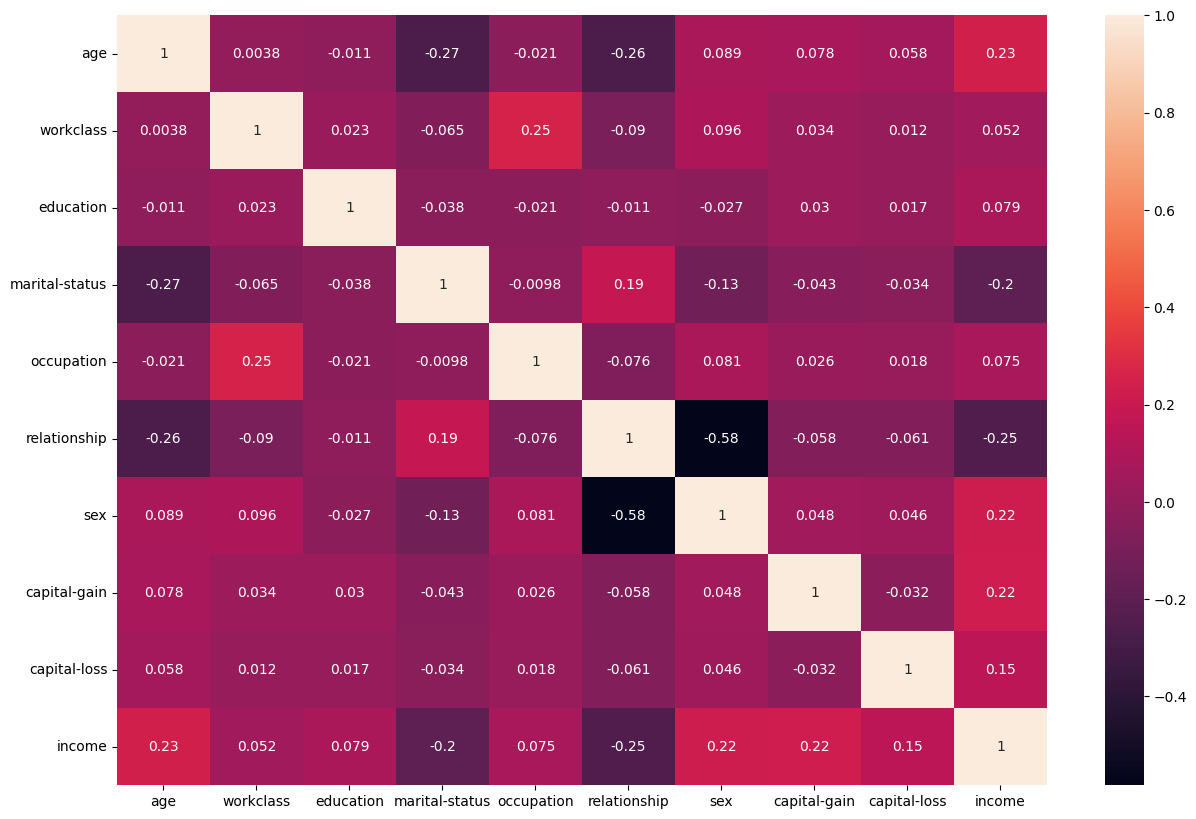

In [16]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True)

## 3. Modelling

First we split the data to separate arrays. X contains the features and y contains the target variable.

In [17]:
data = df.values
X,y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

##### Decision Tree

In [18]:
decTree = DecisionTreeClassifier(random_state = 1)
decTree.fit(X_train, y_train)
y_pred = decTree.predict(X_test)
accuracyDecTree = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print("Decision Tree accuracy score:", accuracyDecTree)

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      7474
           1       0.63      0.61      0.62      2288

    accuracy                           0.83      9762
   macro avg       0.76      0.75      0.75      9762
weighted avg       0.82      0.83      0.82      9762

Decision Tree accuracy score: 0.8252407293587379


##### Logistic Regression

In [19]:
logReg = LogisticRegression(random_state = 1)
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)
accuracyLogReg = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print("Logistic Regression accuracy score:", accuracyLogReg)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7474
           1       0.72      0.28      0.41      2288

    accuracy                           0.81      9762
   macro avg       0.77      0.62      0.65      9762
weighted avg       0.79      0.81      0.77      9762

Logistic Regression accuracy score: 0.8059823806597008


##### Random Forest

In [20]:
randomForest = RandomForestClassifier(random_state = 1)
randomForest.fit(X_train, y_train)
y_pred = randomForest.predict(X_test)
accuracyRandomForest = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print("Random Forest accuracy score:", accuracyRandomForest)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      7474
           1       0.70      0.65      0.67      2288

    accuracy                           0.85      9762
   macro avg       0.80      0.78      0.79      9762
weighted avg       0.85      0.85      0.85      9762

Random Forest accuracy score: 0.8513624257324319


##### Result comparison

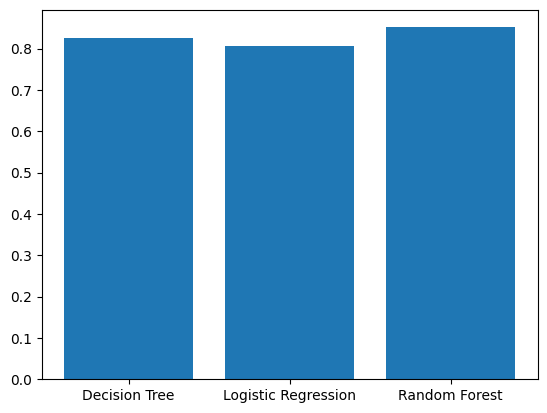

In [21]:
scores = {"Decision Tree":       accuracyDecTree,
          "Logistic Regression": accuracyLogReg,
          "Random Forest":       accuracyRandomForest}
plt.bar(scores.keys(), scores.values())
plt.show()

## 4. Metaparameter tuning

##### Decision Tree - Tuned

In [22]:
param_grid = {
    "max_depth": [3, 5, 7, 9, 15, None],
    "min_samples_split": [2, 4, 6, 8, 10, 12],
    "criterion": ["gini", "entropy"]
}

gscv = GridSearchCV(DecisionTreeClassifier(random_state = 1), param_grid, cv = 5, scoring = "accuracy")
gscv.fit(X_train, y_train)

y_pred = gscv.predict(X_test)
accuracyDecTreeCV = accuracy_score(y_test, y_pred)

print("Best parameters: {}".format(gscv.best_params_))
print("Best accuracy: {}".format(accuracyDecTreeCV))

Best parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 4}
Best accuracy: 0.8558696988322065


##### Logistic Regression - Tuned

In [23]:
param_grid = {
    'penalty': ['l1', 'l2']
}

gscv = GridSearchCV(LogisticRegression(random_state = 1), param_grid, cv = 5, scoring = "accuracy")
gscv.fit(X_train, y_train)

y_pred = gscv.predict(X_test)
accuracyLogRegCV = accuracy_score(y_test, y_pred)

print("Best parameters: {}".format(gscv.best_params_))
print("Best accuracy: {}".format(accuracyLogRegCV))

Best parameters: {'penalty': 'l2'}
Best accuracy: 0.8059823806597008


##### Random Forest - Tuned

In [24]:
# grid search & random forest

param_grid = {
    "n_estimators": [25, 50, 75],
    "max_depth": [10, 20, 30],
}

gscv = GridSearchCV(RandomForestClassifier(random_state = 1), param_grid, cv = 5, scoring = "accuracy")
gscv.fit(X_train, y_train)

y_pred = gscv.predict(X_test)
accuracyRandomForestCV = accuracy_score(y_test, y_pred)

print("Best parameters: {}".format(gscv.best_params_))
print("Best accuracy: {}".format(accuracyRandomForestCV))

bestClassifier = gscv

Best parameters: {'max_depth': 10, 'n_estimators': 50}
Best accuracy: 0.8703134603564844


##### Tuned result comparison

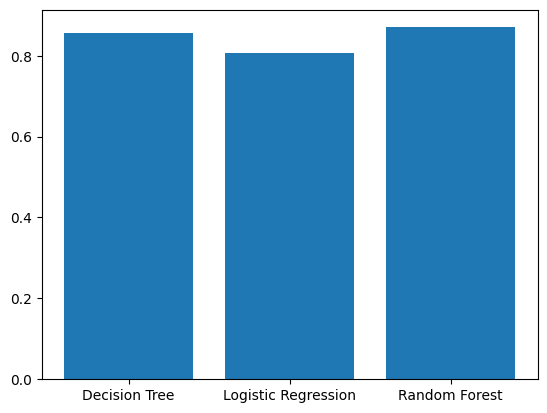

In [25]:
scoresCV = {
    "Decision Tree":       accuracyDecTreeCV,
    "Logistic Regression": accuracyLogRegCV,
    "Random Forest":       accuracyRandomForestCV
}
plt.bar(scoresCV.keys(), scoresCV.values())
plt.show()

## 5. Results
We have used the most accurate classifier (Random Forest - accuracy 87%) to get ROC curve.

##### ROC curve
Following figure shows, the AUC value reaches 91% which is superb.

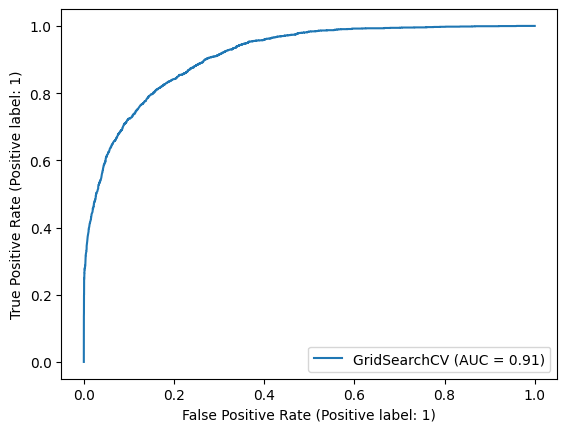

In [26]:
RocCurveDisplay.from_estimator(bestClassifier, X_test, y_test)
plt.show()